# plant.Watering Prediction Model

## Problem Statement
We should predict the water consumption according to weather data

## Import all libraries

In [96]:
# Show Plot immedeately
%matplotlib inline 

from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import pymysql.cursors
import pandas as pd
from datetime import datetime
from sklearn import linear_model
import predictiveanalytics as pa

## Import DataSet

In [97]:
r_DataSet = pd.read_csv("data/DataSet.csv")

r_DataSet

,Date,Value,tre200b0,ure200b0,rre150b0,sre000b0,fu3010b0,prestab0,tre200b0_mean,ure200b0_mean,rre150b0_mean,sre000b0_mean,fu3010b0_mean,prestab0_mean,Value_sum
0,2014-05-27,960.000,12.4,89.0,0.0,0.0,7.2,958.2,15.733333,69.400000,5.030698e-16,12.750000,8.937500,957.695833,0.000
1,2014-05-28,480.000,15.8,62.8,0.0,0.0,0.0,956.0,12.445833,83.887500,3.958333e-01,0.291667,11.583333,957.258333,0.000
2,2014-06-01,960.000,5.8,62.6,0.0,0.0,12.2,957.5,3.600000,87.266667,3.291667e-01,3.750000,6.595833,954.495833,0.000
3,2014-06-02,12.000,5.4,64.5,0.0,0.0,4.7,948.2,2.495833,90.637500,2.083333e-02,0.041667,6.779167,947.650000,2400.000
4,2014-06-05,480.000,17.0,43.3,0.0,0.0,16.2,958.9,11.329167,66.387500,5.065393e-16,31.666667,5.066667,959.604167,1452.000
5,2014-06-06,480.000,23.3,48.2,0.0,52.0,3.2,959.2,14.950000,65.329167,4.834096e-16,29.916667,6.554167,959.183333,1452.000
6,2014-06-08,480.000,20.4,63.1,0.0,0.0,5.8,959.9,18.062500,78.225000,8.333333e-02,10.625000,5.779167,962.829167,972.000
7,2014-06-09,480.000,18.9,73.6,0.0,0.0,6.5,956.9,17.712500,84.508333,5.000000e-02,7.250000,2.625000,958.900000,1440.000
8,2014-06-10,480.000,13.5,88.5,0.0,0.0,9.4,955.1,14.662500,85.537500,5.375000e-01,23.458333,4.979167,958.700000,1440.000
9,2014-06-11,480.000,4.9,87.7,0.0,0.0,2.5,957.4,4.179167,92.216667,2.125000e+00,0.000000,6.820833,948.075000,1440.000


## Variables

Variable | Description
:------------- |:-------------
Date          |   29 non-null object
Value         |   Pump Duration (predicted variable)29 non-null float64
Time          |   29 non-null object
DateTime_x    |   29 non-null object
DateTime_y    |   29 non-null object
tre200b0      |   Lufttemperatur 2 m über Boden; Stundenmittel 24h ago °C (tre200b0)
ure200b0      |   Relative Luftfeuchtigkeit 2 m über Boden; Stundenmittel 24h ago % (ure200b0)
rre150b0      |   Niederschlag; Stundensumme 24h ago mm (rre150b0)
sre000b0      |   Sonnenscheindauer; Stundensumme 24h ago min (sre000b0)
fu3010b0      |   Windgeschwindigkeit skalar; Stundenmittel 24h ago km/h (fu3010b0)
prestab0      |   24h-Mean Luftdruck auf Stationshöhe (QFE); Stundenmittel (from -48h to -24h) hPa (prestab0)
tre200b0_mean |   24h-Mean Lufttemperatur 2 m über Boden; Stundenmittel (from -48h to -24h) °C (tre200b0)
ure200b0_mean |  24h-Mean Relative Luftfeuchtigkeit 2 m über Boden; Stundenmittel (from -48h to -24h) % (ure200b0)
rre150b0_mean  |   24h-Summe Niederschlag; Stundenmittel (from -48h to -24h) mm (rre150b0)
sre000b0_mean  |  24h-Summe Sonnenscheindauer; Stundenmittel (from -48h to -24h) min (sre000b0)
fu3010b0_mean |   24h-Mean Windgeschwindigkeit skalar; Stundenmittel (from -48h to -24h) km/h (fu3010b0)
prestab0_mean |   24h-Mean Luftdruck auf Stationshöhe (QFE); Stundenmittel (from -48h to -24h) hPa (prestab0)
volumelst72h  |  Pump Duration in the last 72 hours

In [98]:
# Print more than one variable
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

r_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
Date             100 non-null object
Value            100 non-null float64
tre200b0         100 non-null float64
ure200b0         100 non-null float64
rre150b0         100 non-null float64
sre000b0         100 non-null float64
fu3010b0         100 non-null float64
prestab0         100 non-null float64
tre200b0_mean    100 non-null float64
ure200b0_mean    100 non-null float64
rre150b0_mean    100 non-null float64
sre000b0_mean    100 non-null float64
fu3010b0_mean    100 non-null float64
prestab0_mean    100 non-null float64
Value_sum        100 non-null float64
dtypes: float64(14), object(1)
memory usage: 11.8+ KB


## Lineares Model

In [99]:
#r_DataSet = r_DataSet[(r_DataSet.Value > 100) & (r_DataSet.Value != 480) & (r_DataSet.Value < 800)]
r_DataSet = r_DataSet[(r_DataSet.Value > 200) & (r_DataSet.Value < 600) & (r_DataSet.Value != 480)]
#r_DataSet = r_DataSet[(r_DataSet.Value < 100)]
#r_DataSet = r_DataSet[(r_DataSet.Value > 600)]

r_DataSet.describe()

,Value,tre200b0,ure200b0,rre150b0,sre000b0,fu3010b0,prestab0,tre200b0_mean,ure200b0_mean,rre150b0_mean,sre000b0_mean,fu3010b0_mean,prestab0_mean,Value_sum
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.00000
mean,415.663867,16.143333,63.463333,0.106667,6.966667,7.190000,863.700000,15.617778,67.778611,8.513889e-02,19.048611,5.434722,897.673750,1341.07890
std,117.946372,8.659644,24.365641,0.511882,15.632599,5.897127,292.886107,7.321263,20.316277,3.090464e-01,13.521654,2.262636,244.068149,522.71145
min,212.809000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,398.66600
25%,324.092250,8.850000,58.725000,0.000000,0.000000,4.300000,954.850000,15.560417,67.188542,2.589942e-15,6.354167,4.063542,957.191667,980.84625
50%,405.520500,19.750000,69.050000,0.000000,0.000000,6.100000,960.400000,18.808333,72.852083,2.960016e-15,18.500000,5.581250,961.927083,1252.96450
75%,521.250000,22.725000,76.800000,0.000000,7.500000,9.650000,963.500000,20.983333,76.915625,8.333333e-03,32.364583,6.295833,965.151042,1518.97300
max,596.706000,25.700000,89.700000,2.800000,60.000000,31.000000,971.500000,22.662500,91.633333,1.600000e+00,37.333333,11.200000,971.366667,2769.00000


### Divide DataSet into TrainingSet (60%) and TestSet (100%) and Define Training Variable (y) and Explanation Variables (X)

In [100]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

p_TrainSet = r_DataSet.sample(frac=0.6, replace=True) #60% of Data
p_TestSet = r_DataSet #100% of Data

Xtrain = p_TrainSet.loc[:,"tre200b0":]

yTrain = p_TrainSet.Value
yTest = p_TestSet.Value

# Test Model, get X and y from TestSet
Xtest = p_TestSet.loc[:,"tre200b0":]

#### Prepare (poly,scale) Features

In [101]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.preprocessing import PolynomialFeatures

Xtrain

polyDegree = 2
Xtrain = PolynomialFeatures(degree=polyDegree).fit_transform(Xtrain).astype(int)
Xtest = PolynomialFeatures(degree=polyDegree).fit_transform(Xtest).astype(int)

from sklearn import preprocessing
X_min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = X_min_max_scaler.fit_transform(Xtrain)
y_min_max_scaler = preprocessing.MinMaxScaler()
yTrain_minmax = y_min_max_scaler.fit_transform(yTrain)

X_test_minmax = X_min_max_scaler.transform(Xtest)
yTest_minmax = y_min_max_scaler.transform(yTest)

#X_min_max_scaler.scale_ 
#y_min_max_scaler.scale_ 

,tre200b0,ure200b0,rre150b0,sre000b0,fu3010b0,prestab0,tre200b0_mean,ure200b0_mean,rre150b0_mean,sre000b0_mean,fu3010b0_mean,prestab0_mean,Value_sum
65,2.3,86.4,0.0,0.0,8.3,955.3,2.287500,83.575000,1.250000e-02,3.625000,4.708333,951.408333,1212.792
89,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1493.944
84,16.1,77.1,0.0,20.0,4.3,959.6,15.525000,91.633333,1.600000e+00,0.000000,5.479167,962.908333,1517.731
68,23.7,63.1,0.0,16.0,4.3,964.2,19.000000,71.904167,2.937465e-15,33.958333,3.995833,967.850000,1032.003
75,21.4,64.6,0.0,0.0,2.9,967.9,16.641667,62.295833,2.959438e-15,32.416667,5.733333,971.366667,979.769
46,22.8,50.2,0.0,12.0,6.1,962.3,20.195833,60.937500,3.744690e-15,16.125000,7.941667,963.804167,1293.137
71,21.2,67.3,0.0,0.0,4.7,954.8,21.800000,69.095833,6.250000e-02,29.625000,5.595833,959.462500,1519.387
88,3.7,88.2,0.0,0.0,10.4,950.0,1.479167,83.595833,1.250000e-02,6.250000,5.566667,953.658333,1161.742
86,13.2,87.6,0.3,0.0,10.4,964.6,21.150000,66.912500,2.851885e-15,33.125000,5.858333,965.500000,984.078
83,7.4,79.6,0.0,0.0,2.5,952.4,5.708333,85.716667,1.916667e-01,0.000000,5.887500,953.854167,1551.088


/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/preproces

### Train Linear Regression and Set Train Variables

Mean squared error: 0.06


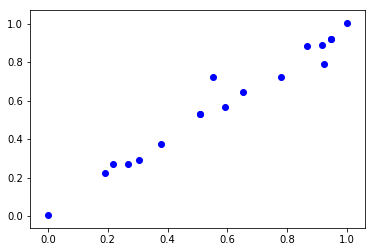

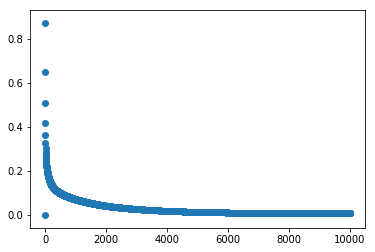

In [102]:
regr = pa.LinearRegression(X_train_minmax, yTrain_minmax)
regr.fit(10000, 0.01)

# The coefficients
#print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_train_minmax) - yTrain_minmax) ** 2) ** 0.5)

# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % regr.score(Xtrain, yTrain))

# Plot outputs

plt.scatter(yTrain_minmax, regr.predict(X_train_minmax), color='blue')
plt.show()
plt.scatter(np.arange(0,regr.costH.size), regr.costH)

#regr.coeff__

Mean squared error: 0.31


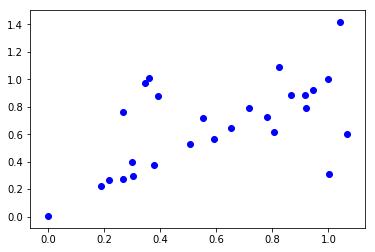

In [103]:
from sklearn.externals import joblib
#joblib.dump(regr, 'lr_medium_values.pkl', compress=9)

model_clone = regr
#model_clone = joblib.load('lr_medium_values.pkl')

error = ((regr.predict(X_test_minmax) - yTest_minmax) ** 2) ** 0.5
# Explained variance score: 1 is perfect prediction
print("Mean squared error: %.2f"
      % np.mean(error))

K = 3
yTest_minmax = np.delete(yTest_minmax,np.argpartition(error,-K)[-K:],0)
X_test_minmax = np.delete(X_test_minmax,np.argpartition(error,-K)[-K:],0)

plt.scatter(yTest_minmax, model_clone.predict(X_test_minmax), color='blue')
plt.show()

In [105]:
#Save the model
#joblib.dump(regr, 'data/myLinReg.pkl')

#joblib.dump(X_min_max_scaler, 'data/X_min_max_scaler.pkl')
#joblib.dump(y_min_max_scaler, 'data/y_min_max_scaler.pkl')


['data/X_min_max_scaler.pkl']

['data/y_min_max_scaler.pkl']

#### Port your model to other languages
Very good source for porting pkl (Pickle) Files to other langauges
https://github.com/nok/sklearn-porter